<a href="https://colab.research.google.com/github/hoonzi-s/APC/blob/main/%231%20ALK%20-%20213BTMRVP%20Inferential.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 라이브러리 불러오기

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split as tts
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold

# 데이터 전처리

In [4]:
data_origin = pd.read_csv('/content/drive/MyDrive/#1 ALK RVP CSV.csv', index_col = 0)
data_origin.info()
data_origin.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 2708 entries, 2014-09-16 to 2022-05-17
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RVP_LAB         2708 non-null   float64
 1   S.B5.213TI2804  2708 non-null   float64
 2   S.B5.213PI2806  2708 non-null   float64
 3   S.B5.213FC2602  2708 non-null   float64
dtypes: float64(4)
memory usage: 105.8+ KB


,RVP_LAB,S.B5.213TI2804,S.B5.213PI2806,S.B5.213FC2602
count,2708.000000,2708.000000,2708.000000,2708.000000
mean,39.308013,133.969684,335.047833,85.923927
std,3.406074,3.452283,29.851255,10.770634
min,28.500000,97.606803,291.821242,35.510519
25%,37.400000,131.998333,318.077753,80.966155
50%,39.000000,133.436735,325.511703,88.584186
75%,40.700000,136.158762,338.359004,92.780427
max,98.600000,145.939417,520.512731,113.968771


In [ ]:
data_origin

,RVP_LAB,S.B5.213TI2804,S.B5.213PI2806,S.B5.213FC2602
2014-09-16,35.5,136.582564,335.836740,89.956760
2014-09-17,33.5,138.822292,338.164993,89.462762
2014-09-18,34.4,138.079717,339.017050,91.780995
2014-09-19,34.3,137.367731,335.839848,96.444227
2014-09-20,35.2,137.442057,349.710404,91.365322
...,...,...,...,...
2022-05-13,43.7,127.127323,326.187806,84.417961
2022-05-14,49.9,123.287827,321.014425,96.055985
2022-05-15,48.7,125.099084,332.709037,92.796671
2022-05-16,51.0,122.406470,325.956086,95.187382


In [5]:
data_origin.columns = ['RVP', 'T', 'P', 'F']
data = data_origin[data_origin['RVP'] < 70]
# data = data_origin[data_origin['RVP'] < 70].sort_values(by = 'RVP')
# data.reset_index(drop = True, inplace = True)
data

,RVP,T,P,F
2014-09-16,35.5,136.582564,335.836740,89.956760
2014-09-17,33.5,138.822292,338.164993,89.462762
2014-09-18,34.4,138.079717,339.017050,91.780995
2014-09-19,34.3,137.367731,335.839848,96.444227
2014-09-20,35.2,137.442057,349.710404,91.365322
...,...,...,...,...
2022-05-13,43.7,127.127323,326.187806,84.417961
2022-05-14,49.9,123.287827,321.014425,96.055985
2022-05-15,48.7,125.099084,332.709037,92.796671
2022-05-16,51.0,122.406470,325.956086,95.187382


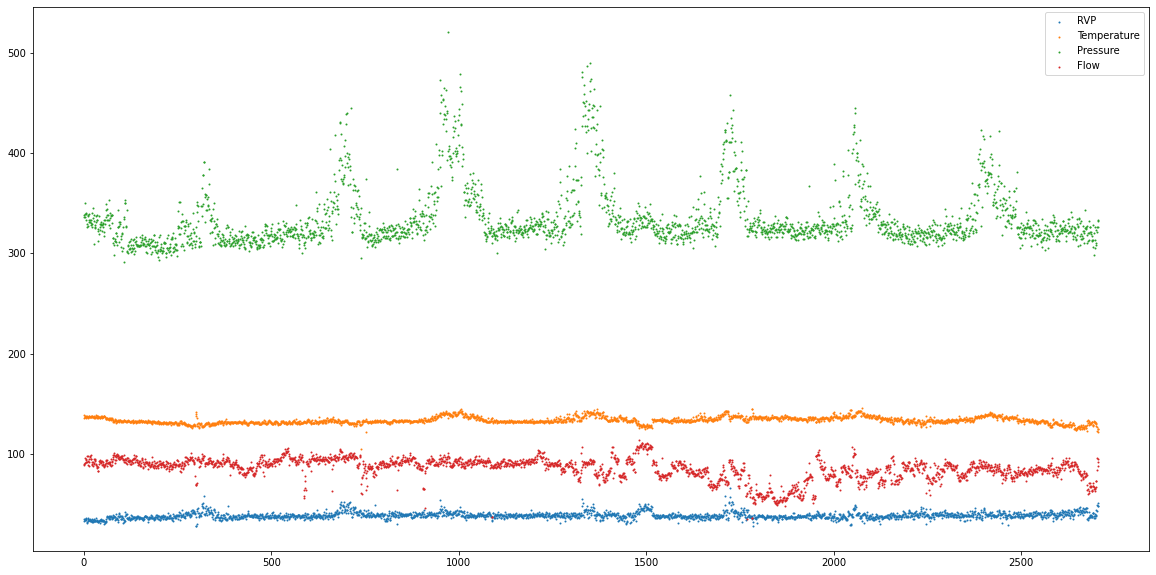

In [ ]:
plt.figure(figsize = (20, 10))
plt.scatter(np.arange(data.shape[0]), data.iloc[:, 0], label = 'RVP', s = 1)
plt.scatter(np.arange(data.shape[0]), data.iloc[:, 1], label = 'Temperature', s = 1)
plt.scatter(np.arange(data.shape[0]), data.iloc[:, 2], label = 'Pressure', s = 1)
plt.scatter(np.arange(data.shape[0]), data.iloc[:, 3], label = 'Flow', s = 1)
plt.legend()
plt.show()

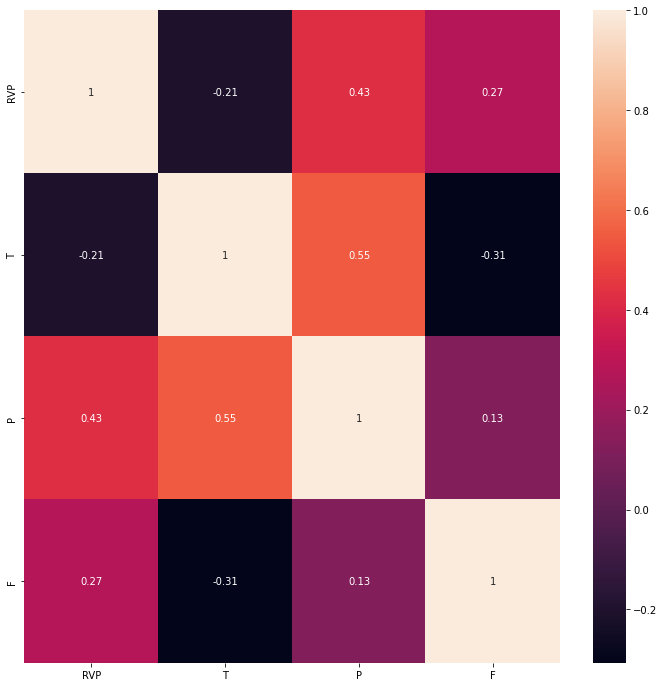

In [ ]:
plt.figure(figsize = (12, 12))
sns.heatmap(data.corr(), linecolor = 'white', annot = True)
plt.show()

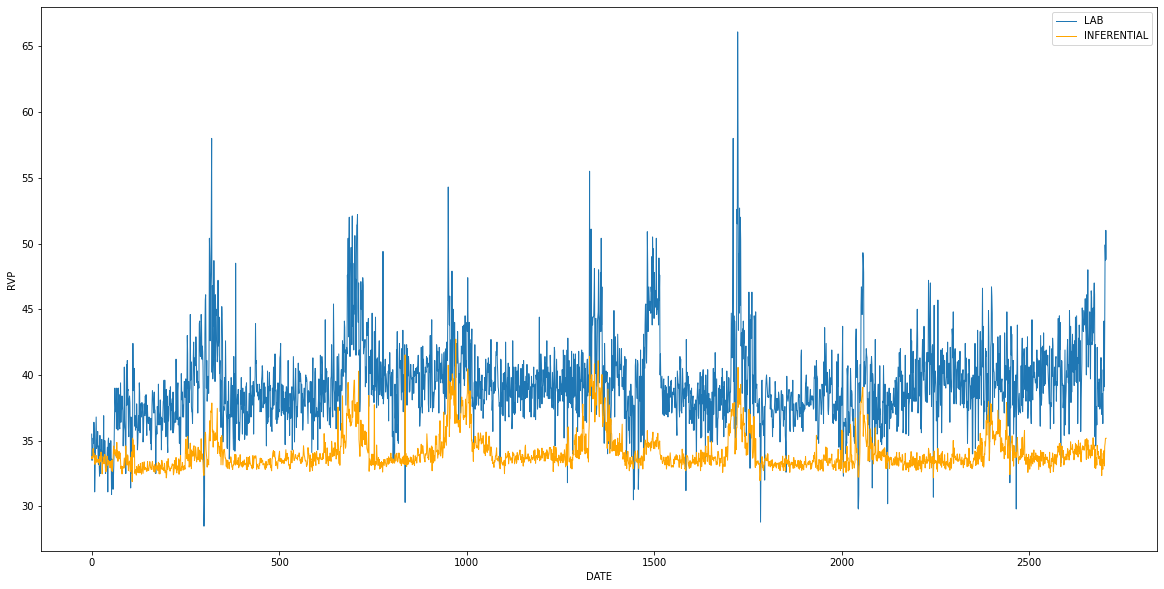

In [9]:
a1 = -0.1343
a2 = 0.0520
b = 34.671
inferential = a1 * data['T'] + a2 * data['P'] + b
length = data.shape[0]

plt.figure(figsize = (20, 10))
# plt.scatter(np.arange(length), data['RVP'], s = 1, label = 'LAB')
plt.plot(np.arange(length), data['RVP'], linewidth = 1, label = 'LAB')
plt.plot(np.arange(length), inferential, linewidth = 1, color='orange', label = 'INFERENTIAL')
plt.xlabel('DATE')
plt.ylabel('RVP')
plt.legend()
plt.show()

In [ ]:
input = data.iloc[:, 1:]
input_log = np.log10(input).reset_index(drop = True, inplace = False)
input_log.columns = ['logT', 'logP', 'logF']
input_log

,logT,logP,logF
0,2.135395,2.526128,1.954034
1,2.142459,2.529129,1.951642
2,2.140130,2.530222,1.962753
3,2.137885,2.526132,1.984276
4,2.138120,2.543709,1.960781
...,...,...,...
2702,2.104239,2.513468,1.926435
2703,2.090920,2.506525,1.982524
2704,2.097254,2.522065,1.967532
2705,2.087804,2.513159,1.978579


In [ ]:
target = data['RVP']
target

2014-09-16    35.5
2014-09-17    33.5
2014-09-18    34.4
2014-09-19    34.3
2014-09-20    35.2
              ... 
2022-05-13    43.7
2022-05-14    49.9
2022-05-15    48.7
2022-05-16    51.0
2022-05-17    48.8
Name: RVP, Length: 2707, dtype: float64

In [ ]:
pf = PolynomialFeatures(include_bias = False)
pf.fit(input)
poly = pf.transform(input)
# poly.get_feature_names_out()
# input_poly.shape
poly = pd.DataFrame(poly, columns = ['T1', 'P1', 'F1', 'T2', 'T1P1', 'T1F1', 'P2', 'P1F1', 'F2'])
poly
poly_log = pd.concat([poly, input_log], axis = 1)
poly_log

,T1,P1,F1,T2,T1P1,T1F1,P2,P1F1,F2,logT,logP,logF
0,136.582564,335.836740,89.956760,18654.796843,45869.443102,12286.524979,112786.315934,30210.785097,8092.218711,2.135395,2.526128,1.954034
1,138.822292,338.164993,89.462762,19271.628839,46944.839490,12419.425748,114355.562423,30253.174402,8003.585851,2.142459,2.529129,1.951642
2,138.079717,339.017050,91.780995,19066.008357,46811.378458,12673.093909,114932.560191,31115.322310,8423.751118,2.140130,2.530222,1.962753
3,137.367731,335.839848,96.444227,18869.893410,46133.557724,13248.324638,112788.403303,32389.814618,9301.488985,2.137885,2.526132,1.984276
4,137.442057,349.710404,91.365322,18890.318977,48064.917251,12557.437755,122297.366876,31951.403643,8347.622037,2.138120,2.543709,1.960781
...,...,...,...,...,...,...,...,...,...,...,...,...
2702,127.127323,326.187806,84.417961,16161.356228,41467.382552,10731.829347,106398.484848,27536.109393,7126.392087,2.104239,2.513468,1.926435
2703,123.287827,321.014425,96.055985,15199.888336,39577.170983,11842.533680,103050.261186,30835.356812,9226.752254,2.090920,2.506525,1.982524
2704,125.099084,332.709037,92.796671,15649.780768,41621.595713,11608.778553,110695.303368,30874.291138,8611.222195,2.097254,2.522065,1.967532
2705,122.406470,325.956086,95.187382,14983.344020,39899.134074,11651.551446,106247.370261,31026.906456,9060.637660,2.087804,2.513159,1.978579


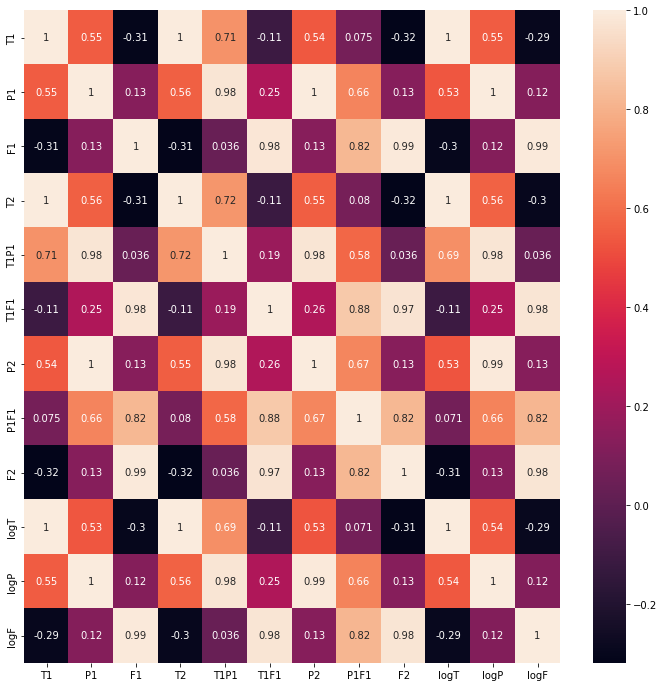

In [ ]:
plt.figure(figsize = (12, 12))
sns.heatmap(poly_log.corr(), linecolor = 'white', annot = True)
plt.show()

In [ ]:
train_input, test_input, train_target, test_target = tts(poly_log, target, test_size = 0.1)

In [ ]:
lr = LinearRegression()
lr.fit(train_input, train_target)
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))
print(lr.coef_)
print(lr.intercept_)

0.5607934414495513
0.46410200550012803
[-3.55953190e+01  5.44176463e-01  6.81268440e-01  6.39952060e-02
  1.65057940e-03 -1.40505987e-02 -6.86076982e-04  1.49115143e-03
  1.65701041e-03  5.65176943e+03 -2.52113488e+02  7.58329853e+01]
-8003.2772477804765


In [ ]:
a = lr.coef_
b = lr.intercept_
result = np.sum(a * poly_log, axis = 1) + b
print(result.shape)
result

(2707,)


0       37.106202
1       35.520511
2       36.040669
3       35.880410
4       37.881679
          ...    
2702    43.458823
2703    46.411748
2704    46.068998
2705    47.473523
2706    45.688728
Length: 2707, dtype: float64

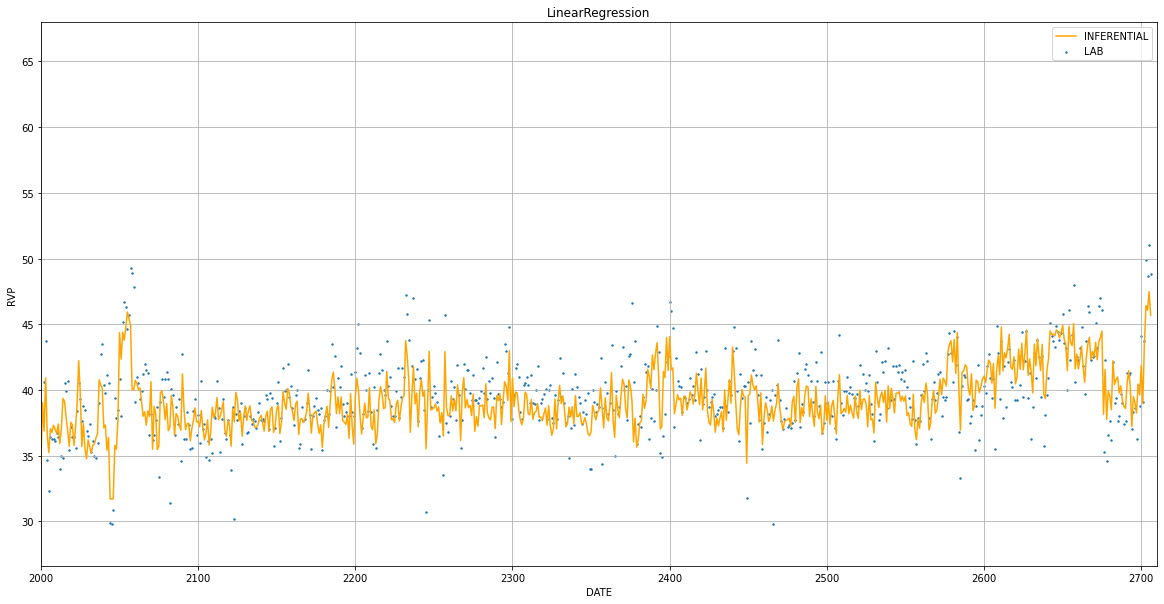

In [ ]:
plt.figure(figsize = (20, 10))
plt.scatter(np.arange(length), data['RVP'], label = 'LAB', s = 2)
# plt.scatter(np.arange(length), result, label = 'RESULT', s = 2, color = 'orange')
# plt.plot(target, label = 'LAB')
plt.plot(result, label = 'INFERENTIAL', color = 'orange')
plt.title('LinearRegression')
plt.xlabel('DATE')
plt.ylabel('RVP')
plt.xlim(2000, 2710)
plt.grid()
plt.legend()
plt.show()

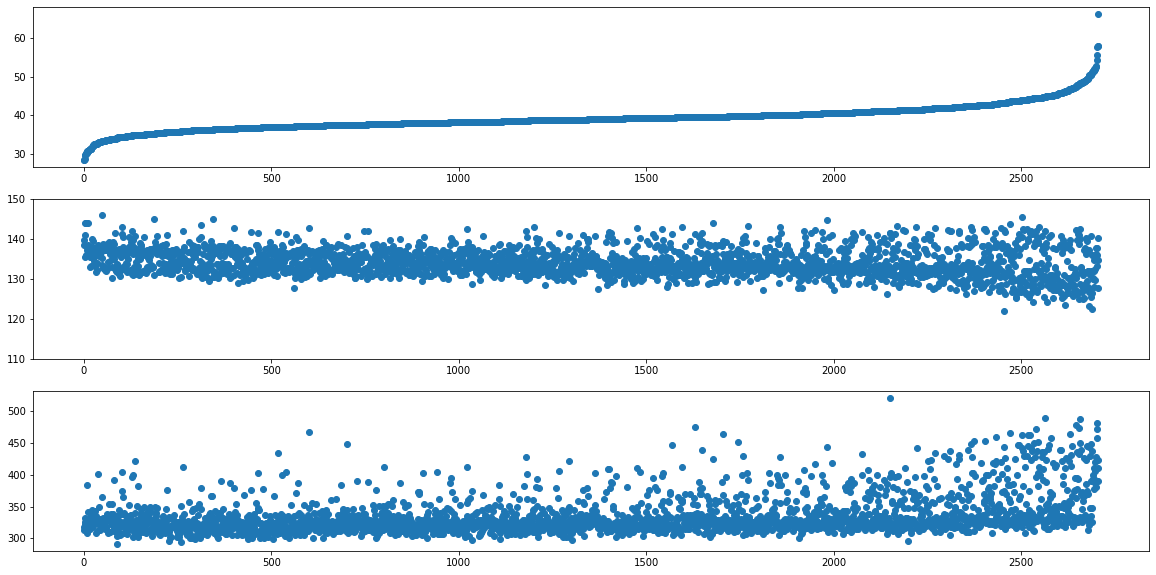

In [ ]:
fig, axs = plt.subplots(3, 1, figsize = (20, 10))

axs[0].scatter(np.arange(length), data['RVP'])
axs[1].scatter(np.arange(length), data['T'])
axs[1].set_ylim([110, 150])
axs[2].scatter(np.arange(length), data['P'])
plt.show()

In [ ]:
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)
input_scaled = ss.transform(poly_log)

lr_ss = LinearRegression()
lr_ss.fit(train_scaled, train_target)
print(lr_ss.score(train_scaled, train_target))
print(lr_ss.score(test_scaled, test_target))
print(lr_ss.coef_)
print(lr_ss.intercept_)

a = lr_ss.coef_
b = lr_ss.intercept_
result = np.sum(a * input_scaled, axis = 1) + b
print(result.shape)
result

0.5607934414495408
0.4641020055001007
[-119.3906209    16.45997814    7.28773763   57.43679835    8.05896422
  -19.33292859  -15.32616687    7.10313047    2.85339262   61.75180797
   -9.09347233    4.54568909]
39.2996715927739
(2707,)


array([37.10620218, 35.52051055, 36.04066909, ..., 46.06899766,
       47.4735228 , 45.68872758])

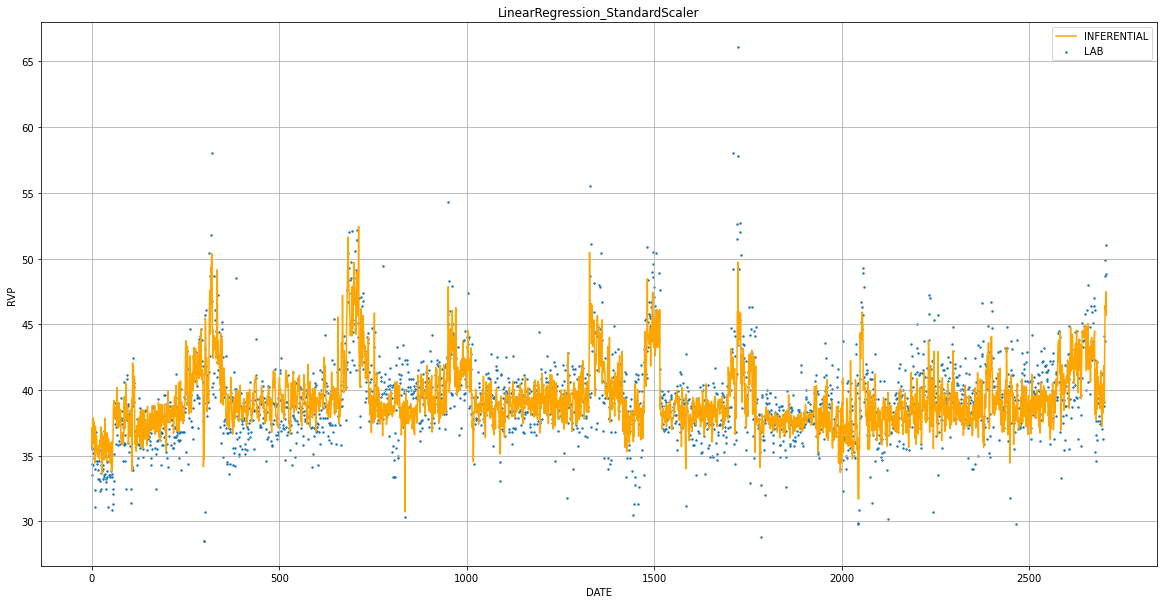

In [ ]:
plt.figure(figsize = (20, 10))
plt.scatter(np.arange(length), data['RVP'], label = 'LAB', s = 2)
# plt.scatter(np.arange(length), result, label = 'RESULT', s = 2, color = 'orange')
# plt.plot(target, label = 'LAB')
plt.plot(result, label = 'INFERENTIAL', color = 'orange')
plt.title('LinearRegression_StandardScaler')
plt.xlabel('DATE')
plt.ylabel('RVP')
# plt.xlim(2000, 2710)
plt.grid()
plt.legend()
plt.show()